
https://cdn.fbsbx.com/v/t59.2708-21/274379551_552187315826034_848003361923148030_n.pdf/Module-1-Lab-Image-Processing-using-Mean-Filter.pdf?_nc_cat=108&ccb=1-7&_nc_sid=2b0e22&_nc_eui2=AeHjZZoCK7xkxK6n7zgqL-t6KuSy6-Xsc-4q5LLr5exz7n4wFjrMtMxXpDy0FVdzHVGoQRNTENK6whhuWfhioGBK&_nc_ohc=Gevay7m2XPIAX96FqUR&_nc_ht=cdn.fbsbx.com&oh=03_AdSD1ORusQucDUXp4psP6IjgFDmabsPSXvwE9h9YXyYLIw&oe=65B399CE&dl=1


In [ ]:
import numpy as np # read the array of the image
from matplotlib import pyplot as plt # use to show the image
import cv2 # read the image

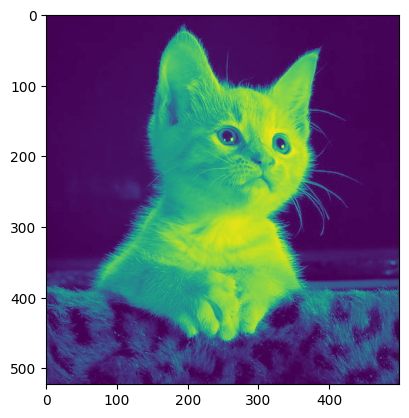

In [ ]:
img_original = cv2.imread("kitten.jpeg", 0)
plt.imshow(img_original)

In [ ]:
pixel_original = np.array([img_original])
pixel_original

array([[[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  2,  2,  2],
        [ 1,  1,  1, ...,  2,  2,  2],
        ...,
        [55, 50, 54, ..., 15, 12,  5],
        [54, 49, 53, ..., 13, 11,  5],
        [53, 48, 52, ..., 10, 10,  5]]], dtype=uint8)

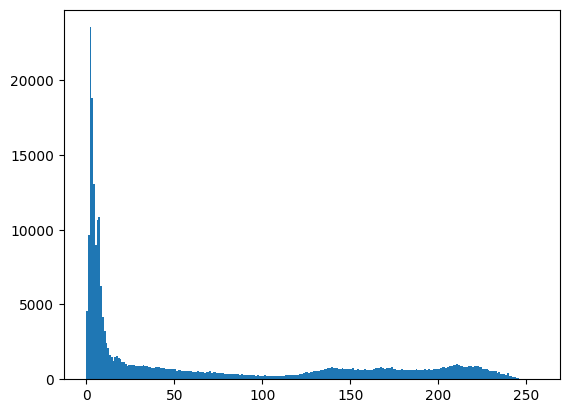

In [ ]:
plt.hist(pixel_original.ravel(), 256, [0, 256])
plt.show() # ravel function is to flatten the array from 2 dimensional top multi-dimensional

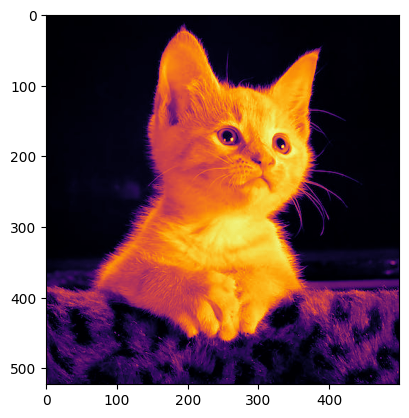

In [ ]:
img1 = img_original
# RdYlGn
plt.imshow(img1, cmap="inferno") # https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
def show(img):
    plt.imshow(img, cmap="gray")
    plt.xticks([]) # referring to the x-axis of the array
    plt.yticks([]) # referring to the y-axis of the array

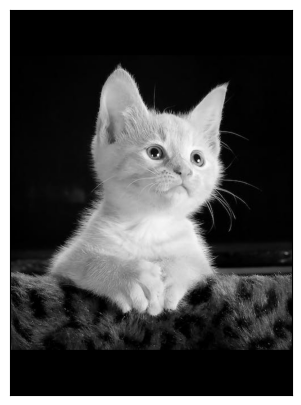

In [ ]:
h, w = img_original.shape
img = np.zeros((h + 160, w), np.uint8) # show the image as if it is uint8 bit
img[80: -80,:] = img_original # dimension
plt.figure(figsize=(15, 5))
plt.subplot(131)
show(img)

In [ ]:
pixel_gray = np.array([img])
pixel_gray

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

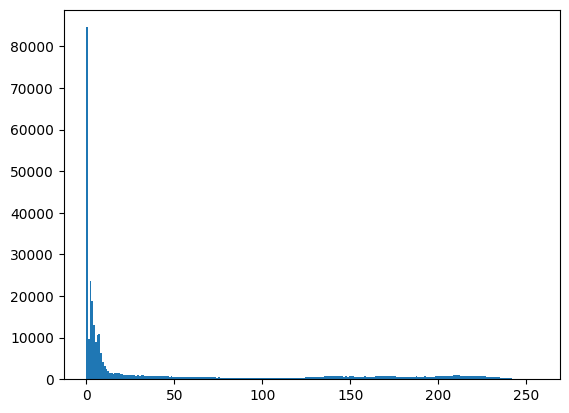

In [ ]:
plt.hist(img.ravel(), 256, [0, 256]) # ravel function is to flatten the array from 2 dimensional top multi-dimensional
plt.show()

In [ ]:
pip install sewar # sewar image quality metrics

  Preparing metadata (setup.py) ... done
  Created wheel for sewar: filename=sewar-0.4.6-py3-none-any.whl size=11420 sha256=943e2dfef62e288e14a616e8d9adcd3fa046d2c0becc64a25e3b99ab3afb8e57
  Stored in directory: /root/.cache/pip/wheels/3f/af/02/9c6556ba287b62a945d737def09b8b8c35c9e1d82b9dfae84c
Successfully built sewar


In [ ]:
from sewar import full_ref # full_ref referred as full reference metrics calculates the mse, rmse, sim
from skimage import measure, metrics
from PIL import Image
from google.colab.patches import cv2_imshow

In [ ]:
mean_kernel = np.ones((3, 3), np.float32) / 25

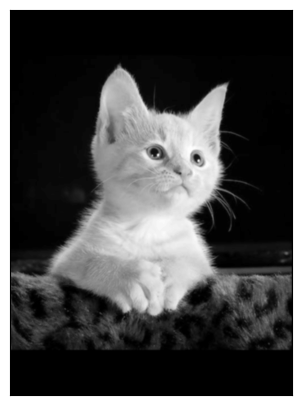

In [ ]:
conv_mean = cv2.filter2D(img, -1, mean_kernel, borderType = cv2.BORDER_CONSTANT)
plt.figure(figsize=(5, 5))
show(conv_mean)

In [ ]:
rmse_skimg = metrics.normalized_root_mse(img, conv_mean)
print("RMSE: based on scikit-image = ", rmse_skimg)

RMSE: based on scikit-image =  0.6427852583028203


In [ ]:
mse_skimg = metrics.mean_squared_error(img, conv_mean)
print("MSE: based on scikit-image = ", mse_skimg)

MSE: based on scikit-image =  3621.365549048316


In [ ]:
psnr_skimg = metrics.peak_signal_noise_ratio(img, conv_mean, data_range=None)
print("PSNR: based on scikit-image = ", psnr_skimg)

PSNR: based on scikit-image =  12.542079951446068


In [ ]:
from skimage.metrics import structural_similarity as ssim
ssim_skimg = ssim(img, conv_mean, data_range=img.max()-img.min(), multichannel=True)
print("SSIM based on scikit-image = ", ssim_skimg)

<ipython-input-21-0c03caf2ee9b>:2: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_skimg = ssim(img, conv_mean, data_range=img.max()-img.min(), multichannel=True)


SSIM based on scikit-image =  0.6672397538986236


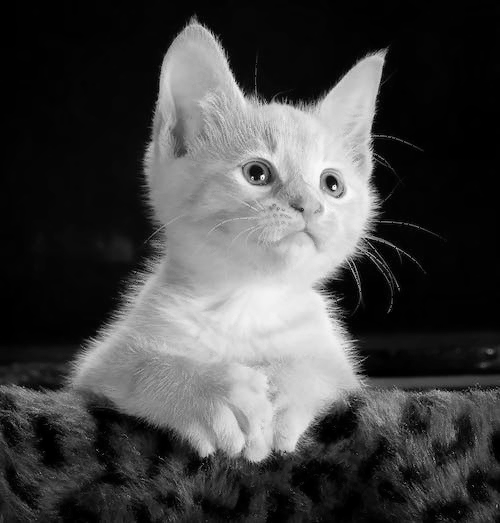

In [ ]:
# adaptive median filter test
kitten = Image.open("kitten.jpeg")

def rgb2gray(rgb):
    if(len(rgb.shape) == 3):
        return np.uint8(np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]))
    else:#already a grayscale
        return rgb

kitten_image = np.array(kitten)
grayscale_image = rgb2gray(kitten_image)

def calculate_median(array):
    """Return the median of 1-d array"""
    sorted_array = np.sort(array) #timsort (O(nlogn))
    median = sorted_array[len(array)//2]
    return median

def level_A(z_min, z_med, z_max, z_xy, S_xy, S_max):
    if(z_min < z_med < z_max):
        return level_B(z_min, z_med, z_max, z_xy, S_xy, S_max)
    else:
        S_xy += 2 #increase the size of S_xy to the next odd value.
        if(S_xy <= S_max): #repeat process
            return level_A(z_min, z_med, z_max, z_xy, S_xy, S_max)
        else:
            return z_med

def level_B(z_min, z_med, z_max, z_xy, S_xy, S_max):
    if(z_min < z_xy < z_max):
        return z_xy
    else:
        return z_med

def amf(image, initial_window, max_window):
    """runs the Adaptive Median Filter proess on an image"""
    xlength, ylength = image.shape #get the shape of the image.

    z_min, z_med, z_max, z_xy = 0, 0, 0, 0
    S_max = max_window
    S_xy = initial_window #dynamically to grow

    output_image = image.copy()

    for row in range(S_xy, xlength-S_xy-1):
        for col in range(S_xy, ylength-S_xy-1):
            filter_window = image[row - S_xy : row + S_xy + 1, col - S_xy : col + S_xy + 1] #filter window
            target = filter_window.reshape(-1) #make 1-dimensional
            z_min = np.min(target) #min of intensity values
            z_max = np.max(target) #max of intensity values
            z_med = calculate_median(target) #median of intensity values
            z_xy = image[row, col] #current intensity

            #Level A & B
            new_intensity = level_A(z_min, z_med, z_max, z_xy, S_xy, S_max)
            output_image[row, col] = new_intensity
    return output_image

output = amf(grayscale_image, 3, 11)
Image.fromarray(output)

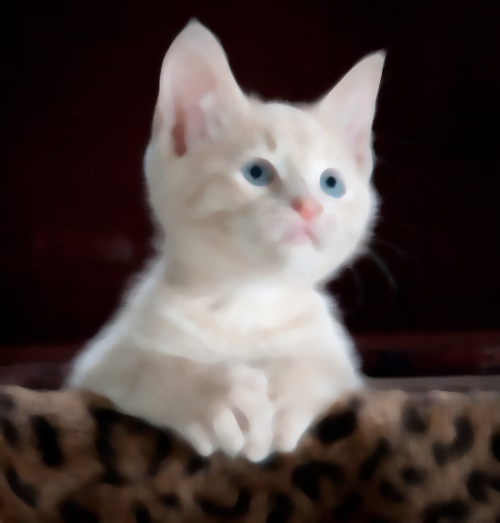

In [ ]:
from PIL import ImageFilter

native_output = kitten.filter(ImageFilter.MedianFilter(size = 11))
native_output

[adaptive median filter](https://github.com/sarnold/adaptive-median/blob/master/AMF.ipynb)  
standard median filter  
alpha trimmed mean filter